Project: Multi-Modal Candidate Shortlisting System  

Objective:  


  

Develop an intelligent system that can assess job candidates using both their resume text and structured profile data to predict whether they should be shortlisted for an interview.
This project simulates a real-world application of deep learning in human resource analytics. It integrates natural language processing and tabular data modeling, encouraging students to apply multi-branch architectures, training strategies, and evaluation metrics used in modern AI systems.



In [1]:
# imports all the needed functions and libraries etc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import re
import tensorflow


Dataset  

You may use or simulate a dataset composed of the following:  

● Resume Texts: Free-form textual content describing candidates’ experiences, education, and skills.  

● Profile Features: Structured attributes such as degree, GPA, years of experience, age, field of study, job role applied for, etc.  

● Target Label: Binary label indicating whether the candidate was shortlisted (1) or not (0).  

Suitable Sources  

● [Resume Dataset](https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset) on Kaggle  


● Additional synthetic or real tabular data (if required)

In [20]:
dataset = pd.read_csv("resume_dataset.csv")
categories = dataset["Category"].unique()
print("Categories present in total for all roles: ")
print(categories)


role_skill_keywords = {
    "Data Science": [
        "python", "machine learning", "deep learning", "data analysis",
        "pandas", "numpy", "tensorflow", "pytorch", "statistics", "modeling"
    ],
    "HR": [
        "recruitment", "onboarding", "hr policies", "employee engagement",
        "training", "talent acquisition", "performance management", "hrms"
    ],
    "Advocate": [
        "legal", "litigation", "contract", "court", "law",
        "compliance", "drafting", "legal research", "case", "attorney"
    ],
    "Arts": [
        "painting", "illustration", "sculpture", "design",
        "creative", "gallery", "exhibition", "fine arts", "aesthetics"
    ],
    "Web Designing": [
        "html", "css", "javascript", "figma", "ui/ux",
        "responsive", "photoshop", "web design", "wireframe", "bootstrap"
    ],
    "Mechanical Engineer": [
        "solidworks", "autocad", "thermodynamics", "mechanical",
        "cad", "manufacturing", "matlab", "creo", "ansys", "mechanics"
    ],
    "Sales": [
        "sales", "negotiation", "client acquisition", "crm",
        "cold calling", "lead generation", "target", "bdm", "deal"
    ],
    "Health and fitness": [
        "fitness", "nutrition", "exercise", "trainer",
        "gym", "yoga", "personal trainer", "health", "strength", "diet"
    ],
    "Civil Engineer": [
        "autocad", "civil", "construction", "structural",
        "estimation", "site engineer", "surveying", "concrete", "roads"
    ],
    "Java Developer": [
        "java", "spring", "hibernate", "jsp", "servlets",
        "j2ee", "maven", "junit", "api", "rest"
    ],
    "Business Analyst": [
        "requirement", "documentation", "business analysis", "gap analysis",
        "stakeholder", "brd", "frd", "uml", "agile", "scrum"
    ],
    "SAP Developer": [
        "sap", "abap", "fi", "co", "hana",
        "module", "erp", "bapi", "sapui5", "fiori"
    ],
    "Automation Testing": [
        "selenium", "testng", "automation", "cypress",
        "junit", "test case", "qa", "scripting", "bug", "regression"
    ],
    "Electrical Engineering": [
        "electrical", "circuit", "power", "electronics",
        "transformer", "control systems", "simulation", "matlab", "microcontroller"
    ],
    "Operations Manager": [
        "operations", "supply chain", "logistics", "vendor",
        "inventory", "planning", "procurement", "kpi", "efficiency"
    ],
    "Python Developer": [
        "python", "django", "flask", "api", "scripting",
        "automation", "pandas", "numpy", "rest", "sql"
    ],
    "DevOps Engineer": [
        "devops", "docker", "kubernetes", "ci/cd",
        "jenkins", "ansible", "terraform", "aws", "monitoring", "pipeline"
    ],
    "Network Security Engineer": [
        "network", "firewall", "security", "vpn",
        "penetration testing", "ccna", "encryption", "siem", "cybersecurity"
    ],
    "PMO": [
        "project management", "pmo", "reporting", "dashboard",
        "status tracking", "milestones", "project plan", "excel", "communication"
    ],
    "Database": [
        "sql", "database", "oracle", "mysql", "query",
        "normalization", "joins", "indexing", "stored procedure", "performance tuning"
    ],
    "Hadoop": [
        "hadoop", "mapreduce", "hdfs", "hive", "spark",
        "pig", "yarn", "big data", "cloudera", "sqoop"
    ],
    "ETL Developer": [
        "etl", "data warehouse", "informatica", "ssis",
        "data pipeline", "extraction", "transformation", "loading", "data integration"
    ],
    "DotNet Developer": [
        "c#", ".net", "asp.net", "mvc", "web api",
        "entity framework", "linq", "sql server", "visual studio", "razor"
    ],
    "Blockchain": [
        "blockchain", "solidity", "smart contract", "ethereum",
        "nft", "web3", "crypto", "dapp", "decentralized", "metamask"
    ],
    "Testing": [
        "manual testing", "test case", "qa", "bug",
        "regression", "test plan", "defect", "reporting", "jira", "functional testing"
    ]
}


def score_resume(resume_text, job_role):
    score = 0
    resume_text = resume_text.lower()
    skills = role_skill_keywords.get(job_role, [])

    for skill in skills:
        if skill in resume_text:
            score += 1

    return score


def generate_label(resume_text, job_role, threshold = 2):
    score = score_resume(resume_text, job_role)
    return 1 if score >= threshold else 0

# Initially without noise I am getting 100% accuracy , precision , recall , ROC-AUC score whatever precision
# I take for evaluation metric - this is because the transformer mode I have trained on is just learning (or
# "memorizing" to be more precise) the function which I have used initially to generate labels without noise

# Trying to add noise and reduce that overfitting problem

def generate_label_realistic_with_global_noise(row, flip_prob=0.1):
    base_label = generate_label(row["Resume"],row["Category"])
    if np.random.rand() < flip_prob:
        return 1 - base_label
    return base_label


def label_row(row):
    return generate_label_realistic_with_global_noise(row,0.1)

dataset["Label"] = dataset.apply(label_row, axis=1)
not_shortlisted = dataset[dataset["Label"] == 0]
print(dataset["Label"].value_counts())
dataset.to_csv("resume_dataset_with_labels.csv", index=False)

Categories present in total for all roles: 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
Label
1    741
0    221
Name: count, dtype: int64


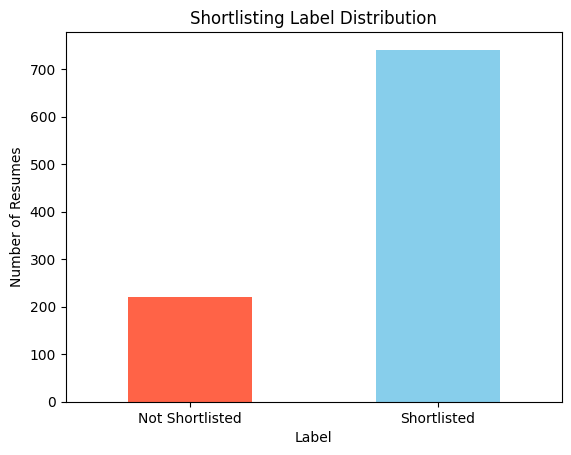

In [21]:
value_counts = dataset["Label"].value_counts().sort_index()

value_counts.plot(kind='bar', color=['tomato', 'skyblue'])
plt.xticks([0, 1], ["Not Shortlisted", "Shortlisted"], rotation=0)
plt.ylabel("Number of Resumes")
plt.title("Shortlisting Label Distribution")
plt.show()


Task Description  

You are required to build a multi-modal deep learning model that:  

● Extracts meaningful features from resumes using a deep NLP model.  

● Processes structured profile features using a feedforward neural network.  

● Combines the two modalities to produce a final prediction indicating the likelihood of the candidate being shortlisted.

**1. Data Preprocessing **

● Clean and tokenize resume texts.  

● Encode categorical variables (e.g., degree, field).  

● Normalize numerical features.  

● (Optional) Utilize pre-trained word embeddings (e.g., GloVe) or contextual embeddings (e.g., BERT).

In [22]:
# clean and tokenize resume texts
# text preprocessing for resume branch
def clean_text(text):
  text = str(text).lower()
  text = re.sub(r'[^\w\s\.\+]', ' ', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text

dataset["Cleaned_Resume"] = dataset["Resume"].apply(clean_text)


# build vocabulary and tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenize
MAX_VOCAB = 10000
MAX_SEQ_LEN = 500
tokenizer = Tokenizer(num_words=MAX_VOCAB,oov_token='<OOV>')
tokenizer.fit_on_texts(dataset["Cleaned_Resume"])
sequences = tokenizer.texts_to_sequences(dataset["Cleaned_Resume"])
X_text = pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

In [23]:
# Encode categorical variables (tabular branch) like degree , field
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
category_encoded = encoder.fit_transform(dataset[["Category"]])




In [24]:
# normalize numerical features

# Here the main issue I have faced is that the resume text is so messy looking and it is "not very practical" to find out
# CGPA and experience by using Regex pattern matching technique from such random resume texts

# So I am synthetically generating the Experience and CGPA columns for better training of multi-branch architecture
# model

# normalize

dataset["GPA"] = np.round(np.random.uniform(6.0, 10.0, size=len(dataset)), 2)
def simulate_experience(role):
    if "Manager" in role or "Senior" in role:
        return np.random.randint(5, 11)
    elif "Engineer" in role or "Developer" in role:
        return np.random.randint(2, 8)
    else:
        return np.random.randint(0, 6)

dataset["Experience"] = dataset["Category"].apply(simulate_experience)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = scaler.fit_transform(dataset[["Experience", "GPA"]])

dataset.to_csv("resume_dataset_after_adding_experience_cgpa.csv")

In [7]:
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-06-23 11:25:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-23 11:25:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-23 11:25:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zi

In [25]:



# utilize pre trained word embeddings like GloVe

# load glove embeddings
def load_glove_embeddings(glove_file_path):
  embeddings_index = {}
  with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = vector
  return embeddings_index



glove_file_path = 'glove.6B.100d.txt'
embeddings_index = load_glove_embeddings(glove_file_path)

# build vocabulary from resume texts

from collections import Counter
def tokenize(text):
  return text.lower().split()


all_tokens = []
for text in dataset["Cleaned_Resume"]:
    all_tokens.extend(tokenize(text))

# build vocab with most common words
vocab_limit = 20000
word_freq = Counter(all_tokens)
vocab = {word: i+2 for i, (word, _) in enumerate(word_freq.most_common(vocab_limit))}
vocab["<pad>"] = 0
vocab["<unk>"] = 1


# create embedding matrix

embedding_dim = 100
embedding_matrix = np.zeros((len(vocab), embedding_dim))

for word, idx in vocab.items():
    if word in embeddings_index:
        embedding_matrix[idx] = embeddings_index[word]
    else:
        embedding_matrix[idx] = np.random.normal(scale=0.6, size=(embedding_dim,))





In [26]:
embedding_tensor = torch.tensor(embedding_matrix, dtype=torch.float32)
embedding_layer = torch.nn.Embedding.from_pretrained(embedding_tensor, freeze=False)

# convert text to index sequences

def text_to_indices(text, vocab, max_len=100):
    tokens = tokenize(text)
    indices = [vocab.get(token, vocab["<unk>"]) for token in tokens]
    if len(indices) < max_len:
        indices += [vocab["<pad>"]] * (max_len - len(indices))
    else:
        indices = indices[:max_len]
    return indices

# Apply to dataset
dataset["Resume_Indices"] = dataset["Cleaned_Resume"].apply(lambda x: text_to_indices(x, vocab))
dataset.to_csv("resume_dataset_after_glove_embeddings.csv")

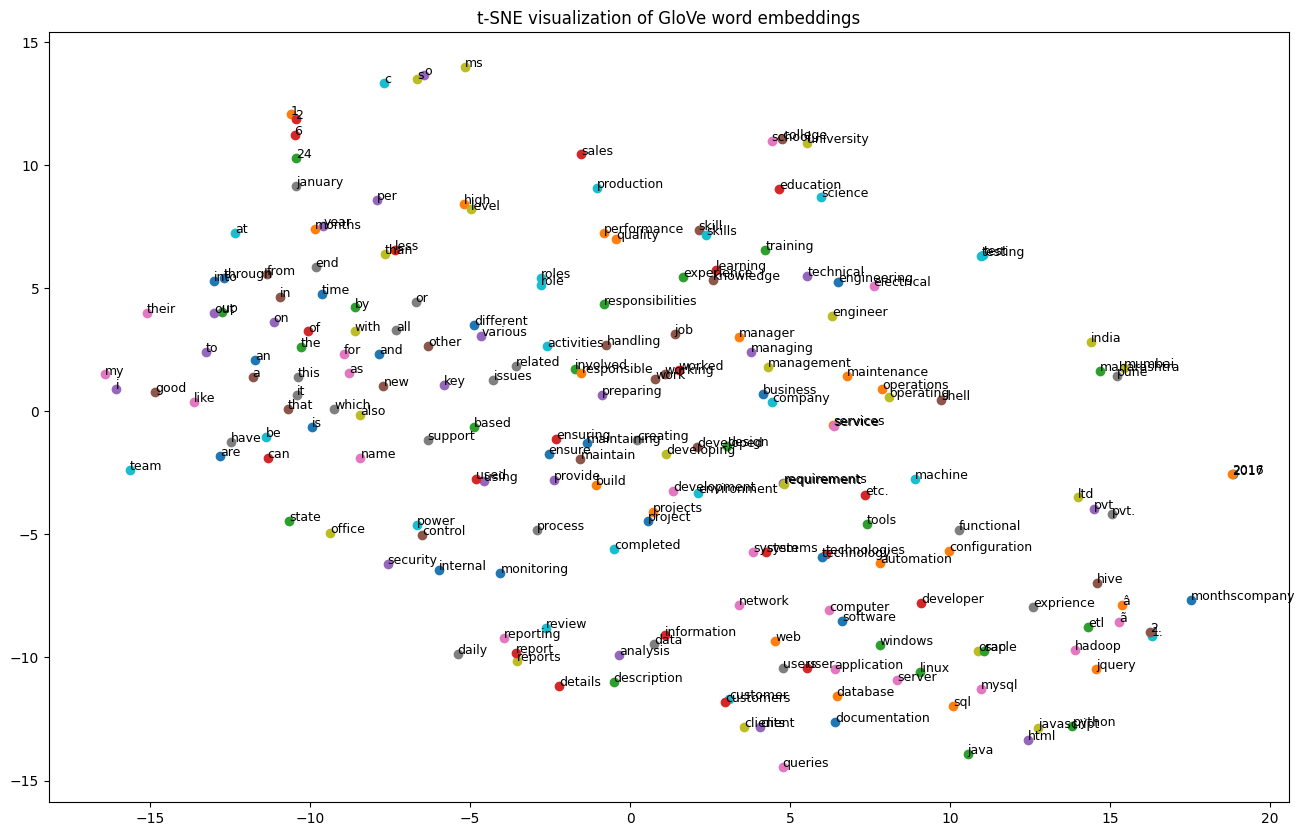

In [27]:
from sklearn.manifold import TSNE


# Select a subset of words for visualization (e.g., 200 common words)
words_to_visualize = list(vocab.keys())[:200]
vectors = []

for word in words_to_visualize:
    idx = vocab[word]
    vectors.append(embedding_matrix[idx])

vectors = np.array(vectors)

# Reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(16, 10))
for i, word in enumerate(words_to_visualize):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, xy=(reduced[i, 0], reduced[i, 1]), fontsize=9)
plt.title("t-SNE visualization of GloVe word embeddings")
plt.show()


**2. Model Architecture **

● Construct a dual-branch network:  

○ Text Branch: Implement using CNN, LSTM, or a transformer model (BERT or equivalent).  

○ Tabular Branch: Use a multilayer perceptron (MLP) with appropriate activation functions, dropout, and normalization.  

● Merge both branches before final classification layers.  


In [ ]:
!pip install transformers
from transformers import AutoModel

bert = AutoModel.from_pretrained("bert-base-uncased")


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

ValueError: Could not find BertModel neither in <module 'transformers.models.bert' from '/usr/local/lib/python3.11/dist-packages/transformers/models/bert/__init__.py'> nor in <module 'transformers' from '/usr/local/lib/python3.11/dist-packages/transformers/__init__.py'>!

In [28]:
from transformers.models.bert.modeling_bert import BertModel
import torch.nn as nn

class ResumeModel(nn.Module):
  def __init__(self,tabular_input_dim=2,tabular_hidden_dim=64,dropout=0.3,freeze_bert=False):
    super(ResumeModel,self).__init__()

    # Text branch built using BERT transformer model
    self.bert = BertModel.from_pretrained("bert-base-uncased")
    self.text_dropout = nn.Dropout(dropout)

    if freeze_bert:
      for param in self.bert.parameters():
        param.requires_grad = False

    # Tabular branch built using MLP

    self.tabular_net = nn.Sequential(
        nn.Linear(tabular_input_dim, tabular_hidden_dim),
        nn.ReLU(),
        nn.BatchNorm1d(tabular_hidden_dim),
        nn.Dropout(dropout),
        nn.Linear(tabular_hidden_dim, 32),
        nn.ReLU()
    )

    # Merged classifier

    combined_input_dim = self.bert.config.hidden_size+32
    self.classifier = nn.Sequential(
            nn.Linear(combined_input_dim, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )


  def forward(self,input_ids,attention_mask,tabular_data):
    # Text branch
    text_output = self.bert(input_ids=input_ids,attention_mask=attention_mask)
    text_feat = self.text_dropout(text_output.pooler_output)

    # Tabular branch

    tabular_feat = self.tabular_net(tabular_data)

    # Merge branches
    combined = torch.cat((text_feat, tabular_feat), dim=1)

    # Final output
    logits = self.classifier(combined)
    return logits  # raw logits for use with BCEWithLogitsLoss

In [29]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from torch.optim import AdamW
from transformers import BertTokenizer, get_linear_schedule_with_warmup
from tqdm import tqdm

# dataset preparation

class ResumeDataset(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.texts = df["Cleaned_Resume"].tolist()
        self.labels = df["Label"].values
        self.tabular = df[["Experience", "GPA"]].values.astype(np.float32)
        self.max_len = max_len

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text = self.texts[idx]
        inputs = self.tokenizer(text, max_length=self.max_len, padding='max_length', truncation=True, return_tensors="pt")
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'tabular_data': torch.tensor(self.tabular[idx]),
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }

# load and split data

train_df, val_df = train_test_split(dataset, test_size=0.2, stratify=dataset['Label'], random_state=42)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_dataset = ResumeDataset(train_df, tokenizer, max_len=128)
val_dataset = ResumeDataset(val_df, tokenizer, max_len=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True,drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=16,drop_last=True)

# model initialization

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResumeModel().to(device)

# loss function with class weights

class_weights = compute_class_weight('balanced', classes=np.unique(dataset['Label']), y=dataset['Label'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
loss_fn = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])

# optimizer and scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 5
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# training loop with early stopping

def train_model(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs, patience=2):
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for batch in tqdm(train_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            tabular_data = batch['tabular_data'].to(device)
            labels = batch['labels'].unsqueeze(1).to(device)

            optimizer.zero_grad()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, tabular_data=tabular_data)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                tabular_data = batch['tabular_data'].to(device)
                labels = batch['labels'].unsqueeze(1).to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask, tabular_data=tabular_data)
                loss = loss_fn(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)

        print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")

        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), "best_model.pt")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

train_model(model, train_loader, val_loader, loss_fn, optimizer, scheduler, epochs=5)

100%|██████████| 48/48 [00:24<00:00,  1.93it/s]


Epoch 1: Train Loss = 0.4679, Val Loss = 0.4414


100%|██████████| 48/48 [00:22<00:00,  2.12it/s]


Epoch 2: Train Loss = 0.4107, Val Loss = 0.3692


100%|██████████| 48/48 [00:22<00:00,  2.12it/s]


Epoch 3: Train Loss = 0.3587, Val Loss = 0.3355


100%|██████████| 48/48 [00:23<00:00,  2.05it/s]


Epoch 4: Train Loss = 0.3270, Val Loss = 0.3204


100%|██████████| 48/48 [00:23<00:00,  2.08it/s]


Epoch 5: Train Loss = 0.3051, Val Loss = 0.3196


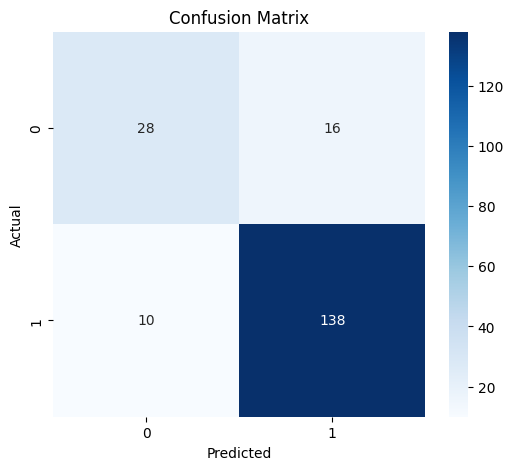

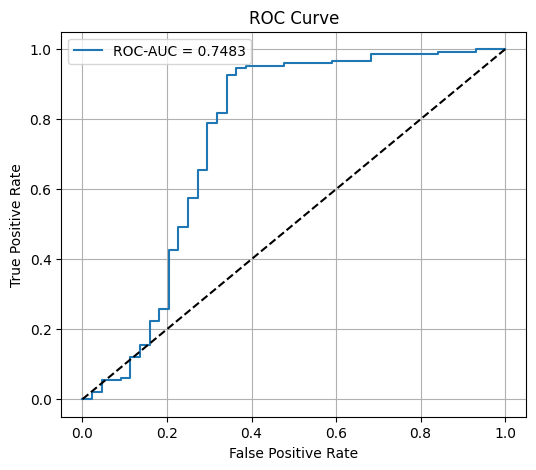

Precision: 0.8961
Recall: 0.9324
F1 Score: 0.9139
ROC-AUC: 0.7483


(0.8961038961038961,
 0.9324324324324325,
 0.9139072847682119,
 np.float64(0.7483108108108109))

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns


def evaluate_model(model, val_loader, threshold=0.5):
    model.eval()
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            tabular_data = batch['tabular_data'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, tabular_data=tabular_data)
            probs = torch.sigmoid(outputs).squeeze().cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(labels.cpu().numpy())

    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)
    predictions = (all_probs >= threshold).astype(int)

    # Metrics
    precision = precision_score(all_labels, predictions)
    recall = recall_score(all_labels, predictions)
    f1 = f1_score(all_labels, predictions)
    roc_auc = roc_auc_score(all_labels, all_probs)

    # Confusion Matrix
    cm = confusion_matrix(all_labels, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    return precision, recall, f1, roc_auc


# Evaluate
evaluate_model(model, val_loader, threshold=0.5)
